In [1]:
# 텐서플로우의 기본적인 구성을 익힙니다.
import tensorflow as tf

# tf.constant: 말 그대로 상수입니다.
hello = tf.constant('Hello, TensorFlow!')
print(hello)

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)  # a + b 로도 쓸 수 있음
print("1. C", c)

# 위에서 변수와 수식들을 정의했지만, 실행이 정의한 시점에서 실행되는 것은 아닙니다.
# 다음처럼 Session 객제와 run 메소드를 사용할 때 계산이 됩니다.
# 따라서 모델을 구성하는 것과, 실행하는 것을 분리하여 프로그램을 깔끔하게 작성할 수 있습니다.
# 그래프를 실행할 세션을 구성합니다.
sess = tf.Session()
# sess.run: 설정한 텐서 그래프(변수나 수식 등등)를 실행합니다.
print("2. Hello", sess.run(hello))
print("3. A,B,C", sess.run([a, b, c]))

# 세션을 닫습니다.
sess.close()


//anaconda2/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


Tensor("Const:0", shape=(), dtype=string)
1. C Tensor("Add:0", shape=(), dtype=int32)
2. Hello b'Hello, TensorFlow!'
3. A,B,C [10, 32, 42]


# Tensorflow Basic Usage

> Tensorflow : graph로 연산을 나타내는 프로그래밍 시스템
> TensorFlow is an open source software library for numerical computation using data flow graphs

- <span class="mark">연산은 graph 로 표현</span>
    - node : operation (작업 / 0개 이상의 Tensor 를 가가지거나 만들어 냄)
    - tensor : 정형화된 다차원 배열
    - edge : multidimensional data arrays(tensors) communicated between them
- <span class="mark">graph는 Session 내에서 실행</span>
    - graph 는 연산을 표현하는 방식
    - 연산을 하기 위해 graph 는 Session 상에서 실행되어야 함
    - Session : graph의 operation 을 CPU or GPU (Device)에 배정하고 실행을 위한 메서드 제공
- 데이터는 tensor 로 표현
- 변수는 그 상태를 유지
- operation 에서 데이터 입/출력시 feed, fetch 사용

https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/get_started/basic_usage.html

In [2]:
#constant op
#op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

#seart a TF session
sess = tf.Session()

#run the op
print(sess.run(hello))

## 실행 결과 : b'Hello, TensorFlow!'
###--> 'b' : indicates Bytes literals

b'Hello, TensorFlow!'


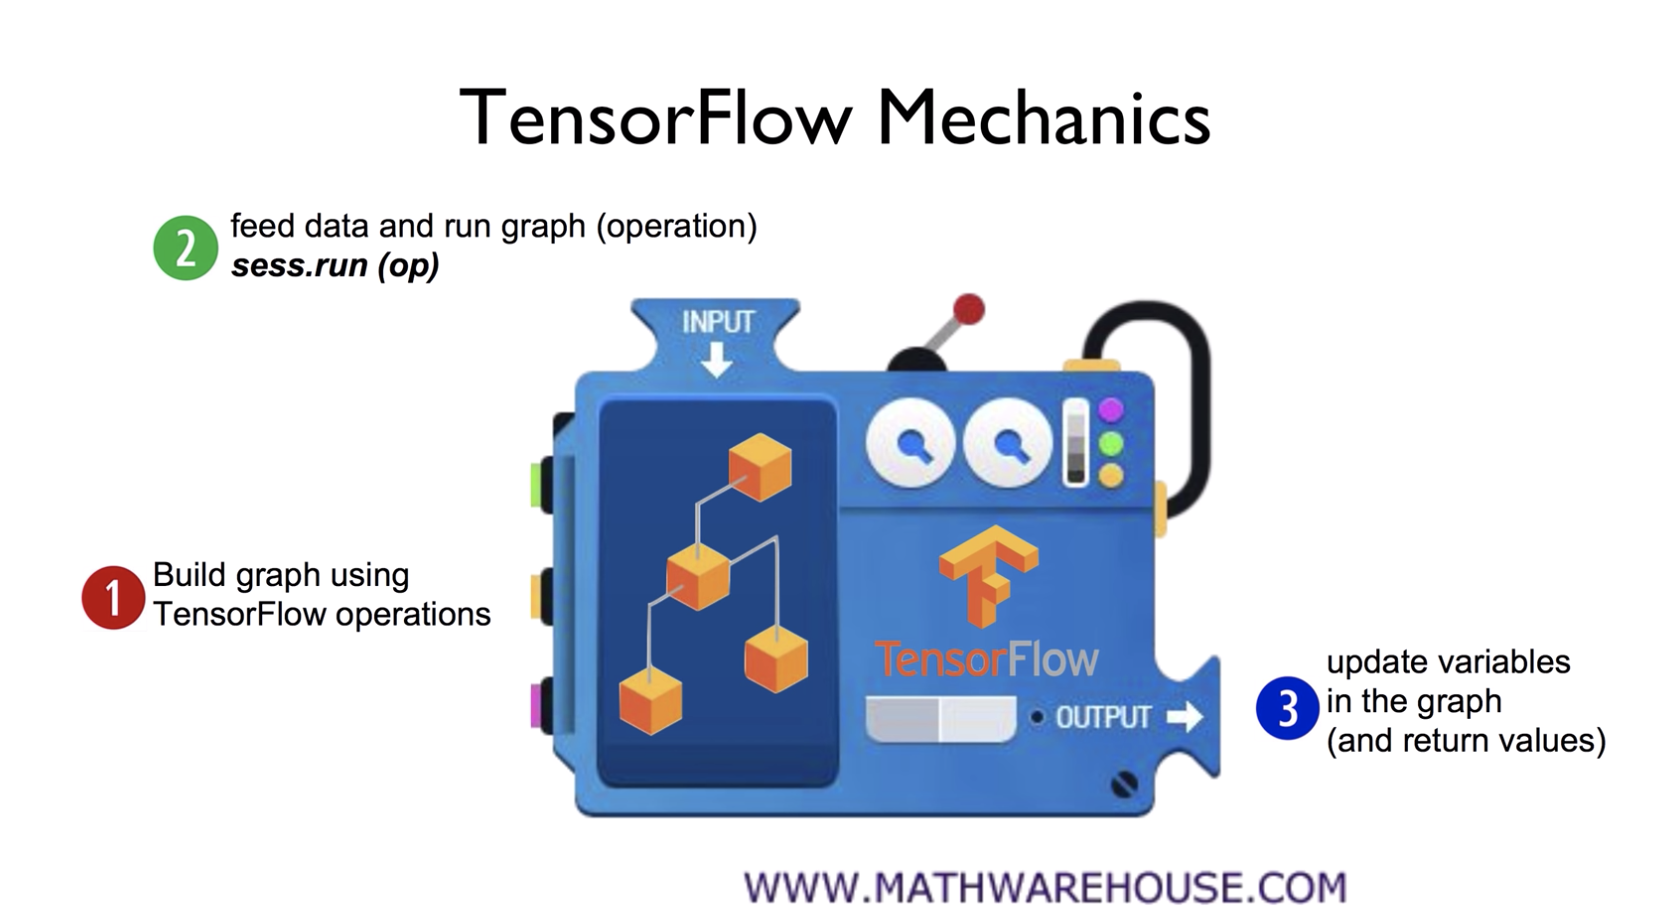

In [5]:
from IPython.display import Image
 
Image("img/TF_overall.png") # code안에서 나오게 할 때

## Graph 생성

1. 상수 (constant) 정의 - 아무 입력값이 필요없는 작업(op-node) 정의 
2. 상수 op 를 연산이 필요한 다른 op 에 입력값으로 제공


ex. 3개의 노드로 구성된 default graph
- constant op 개 (a, b)
- matadd node

(1) Build graph(tensors) using Tensorflow operation


In [3]:
node1= tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1, node2)

print("node1:", node1, "node2:", node2)
print("node3:", node3)

## 출력결과 value 가 아닌 Tensor 가 실행됨

node1: Tensor("Const_4:0", shape=(), dtype=float32) node2: Tensor("Const_5:0", shape=(), dtype=float32)
node3: Tensor("Add_1:0", shape=(), dtype=float32)


(2) Feed data and rung graph(operation)
- sess.run(op)

In [4]:
sess = tf.Session()
print("sess.run(node1, node2):", sess.run([node1, node2]))
print("sess.run(node3):", sess.run(node3))

sess.run(node1, node2): [3.0, 4.0]
sess.run(node3): 7.0


ex. 3개의 노드로 구성된 default graph
- constant op 2개
- matmul (행렬곱) op 1개

In [5]:
# 1*2 행렬 constant op --> graph의 node 가 됨
matrix1 = tf.constant([[3., 3.,]])

# 2*1 행렬
matrix2 = tf.constant([[2.],[2.]])

# matrix1 & matrix2 행렬곱 op
product = tf.matmul(matrix1, matrix2)


In [9]:
print(matrix1)
print(matrix2)

Tensor("Const_5:0", shape=(1, 2), dtype=float32)
Tensor("Const_6:0", shape=(2, 1), dtype=float32)


## Session에서 Graph 실행

1. session object 생성
2. session.run()
3. session.close()

In [6]:
sess = tf.Session()
result = sess.run(product)
print(result)

sess.close()

[[12.]]


In [ ]:
[1.,2.,3.,]

cf. with 구문 사용

In [13]:
with tf.Session() as sess:
    result = sess.run([product])
    print(result)

[array([[12.]], dtype=float32)]


cf. with 구문 사용 & GPU 설정 코드
- "/cpu:0" : 컴퓨터의 CPU
- "/gpu:0" : 컴퓨터의 1번째 GPU
- "/gpu:1" : 컴퓨터의 2번째 GPU

In [15]:
with tf.Session() as sess:
    with tf.device("/gpu:1"):
        matrix1 = tf.constant([[3., 3.]])
        matrix2 = tf.constant([[2.],[2.]])
        product = tf.matmul(matrix1, matrix2)

### Distributed Session

In [19]:
with tf.Session("grpc://example.org:2222") as sess:
    print("...Session 인스턴스화 : Session을 cluster의 머신 네트워크 위치로 넘김")
  # sess.run(...)을 호출하면 클러스터에서 실행될 것입니다.
  # Calls to sess.run(...) will be executed on the cluster.

...Session 인스턴스화 : Session을 cluster의 머신 네트워크 위치로 넘김


In [20]:
with tf.device("/job:ps/task:0"):
#     weights = tf.Variable(...)
#     biases = tf.Variable(...)
    print("...특정 머신에게 직접 graph의 특정 부분 지정")

...특정 머신에게 직접 graph의 특정 부분 지정


### Interactive Usage
- InteractiveSession Class
- Tensor.eval() or Operation.run() 

: Session 내에서 변수를 계속 유지할 필요가 없는 경우

In [25]:
sess = tf.InteractiveSession()

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# x 초기화
x.initializer.run()

# 빼기
sub = tf.subtract(x, a)
print(sub.eval())

sess.close()

[-2. -1.]
